In [1]:
import os
from glob import glob
import json
import tqdm

In [2]:
class_names = ['C042', 'C041', 'C012', 'C021']

In [3]:
class_names_list = {class_name:[] for class_name in class_names}
class_names_list

{'C042': [], 'C041': [], 'C012': [], 'C021': []}

In [4]:
paths = glob("./customData/E2ON/*.json")
len(paths)

1691

In [5]:
for class_name in (class_names_list.keys()):
    for path in tqdm.tqdm(paths):
        with open(path, "r") as f:
            temp_json = json.load(f)

        if temp_json["label"] == class_name:
            class_names_list[class_name].append(path)
    

100%|██████████| 1691/1691 [02:50<00:00,  9.90it/s]


In [ ]:
import pickle
# with open("class_names_list.pkl", "wb") as f:
#     pickle.dump(class_names_list, f)

In [7]:
length_list = {class_name: len(class_names_list[class_name]) for class_name in class_names}
# with open("length_list.pkl", "wb") as f:
#     pickle.dump(length_list, f)


In [8]:
length_list

{'C042': 262, 'C041': 128, 'C012': 108, 'C021': 1193}

<BarContainer object of 4 artists>

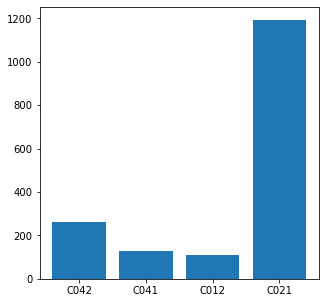

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.bar(length_list.keys(), length_list.values())

In [10]:
def train_test_split(class_name):
    train_size = int(len(class_names_list[class_name]) * 0.7 )

    train = class_names_list[class_name][:train_size]
    test = class_names_list[class_name][train_size:]
    return train, test

In [11]:
for key in tqdm.tqdm(class_names_list.keys()):
    train, test = train_test_split(key)

    for path in train:
        filename = os.path.basename(path)

        current = "./customData/E2ON/"+filename
        os.system(f"cp {current} ./allE2ON/train/")
        # os.system(f"cp {current} ./allConvertedData/train/")

    for path in test:
        filename = os.path.basename(path)
        current = "./customData/E2ON/"+filename
        os.system(f"cp {current} ./allE2ON/val/")
        # os.system(f"cp {current} ./allConvertedData/val/")

100%|██████████| 4/4 [00:38<00:00,  9.71s/it]
